In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\ogev0\Documents\Jayani\Hackathons\MTW25_FinTechHackathon_TEAM\mini_dataset_10L.csv')

# Check missing values
print(df.isnull().sum())

# Fill missing 'Merchant State' with 'Unknown'
df['Merchant State'].fillna('Unknown', inplace=True)

# Fill missing 'Zip' with 00000
df['Zip'].fillna(00000, inplace=True)

# Fill missing 'Errors?' with 'No Error'
df['Errors?'].fillna('No Error', inplace=True)

# Verify if missing values are handled
print(df.isnull().sum())

# Save cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)
print("Dataset cleaned and saved as 'cleaned_dataset.csv'")


User                   0
Card                   0
Year                   0
Month                  0
Day                    0
Time                   0
Amount                 0
Use Chip               0
Merchant Name          0
Merchant City          0
Merchant State    149411
Zip               155506
MCC                    0
Errors?           983987
Is Fraud?              0
dtype: int64


C:\Users\ogev0\AppData\Local\Temp\ipykernel_27172\2560759007.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Merchant State'].fillna('Unknown', inplace=True)
C:\Users\ogev0\AppData\Local\Temp\ipykernel_27172\2560759007.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

User              0
Card              0
Year              0
Month             0
Day               0
Time              0
Amount            0
Use Chip          0
Merchant Name     0
Merchant City     0
Merchant State    0
Zip               0
MCC               0
Errors?           0
Is Fraud?         0
dtype: int64
Dataset cleaned and saved as 'cleaned_dataset.csv'


In [2]:
# Load MCC table
mcc_df = pd.read_csv(r'C:\Users\ogev0\Documents\Jayani\Hackathons\MTW25_FinTechHackathon_TEAM\mcc_codes.csv')

# Standardize column names (capitalize 'mcc' to 'MCC')
mcc_df.rename(columns={'mcc': 'MCC'}, inplace=True)

# Convert 'MCC' columns to string for consistency
df['MCC'] = df['MCC'].astype(str)
mcc_df['MCC'] = mcc_df['MCC'].astype(str)

# Merge cleaned dataset with MCC table
df_merged = pd.merge(df, mcc_df, on='MCC', how='left')

# Display merged dataset
print(df_merged.head())


   User  Card  Year  Month  Day   Time    Amount            Use Chip  \
0    66     0  2010     10   24  14:41    $25.61  Online Transaction   
1     2     3  2015      7    6  16:43     $8.68    Chip Transaction   
2    58     0  2008      8   24  10:32  $1404.07   Swipe Transaction   
3    52     0  2010      4   15  11:11    $11.26   Swipe Transaction   
4    29     2  2013      7   17  11:09    $10.48   Swipe Transaction   

   Merchant Name Merchant City Merchant State      Zip   MCC   Errors?  \
0  -1.688240e+18        ONLINE        Unknown      0.0  4784  No Error   
1   1.799190e+18      Alhambra             CA  91801.0  5499  No Error   
2  -1.964270e+18       Houston             TX  77056.0  6300  No Error   
3  -4.927380e+18         Inman             SC  29349.0  5812  No Error   
4   8.602430e+18  Murfreesboro             TN  37130.0  5411  No Error   

  Is Fraud?                                 edited_description  \
0        No                               Toll and Bridg

In [3]:
# Save the merged dataset as a CSV file
df_merged.to_csv(r'C:\Users\ogev0\Documents\Jayani\Hackathons\MTW25_FinTechHackathon_TEAM\merged_dataset.csv', index=False)

print("Merged dataset saved successfully!")


Merged dataset saved successfully!


In [4]:
# Clean 'irs_reportable' column
df_merged['irs_reportable'] = df_merged['irs_reportable'].apply(lambda x: 'No' if str(x).startswith('No') else 'Yes')

# Verify the changes
print(df_merged['irs_reportable'].value_counts())


irs_reportable
No     838799
Yes    161201
Name: count, dtype: int64


In [5]:
df_merged.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,edited_description,combined_description,usda_description,irs_description,irs_reportable
0,66,0,2010,10,24,14:41,$25.61,Online Transaction,-1.688240e+18,ONLINE,Unknown,0.0,4784,No Error,No,Toll and Bridge Fees,Toll and Bridge Fees,Toll and Bridge Fees,Tolls/Bridge Fees,No
1,2,3,2015,7,6,16:43,$8.68,Chip Transaction,1.799190e+18,Alhambra,CA,91801.0,5499,No Error,No,Misc. Food Stores – Convenience Stores and Spe...,Misc. Food Stores – Convenience Stores and Spe...,Misc. Food Stores – Convenience Stores and Spe...,Miscellaneous Food Stores - Convenience Stores...,No
2,58,0,2008,8,24,10:32,$1404.07,Swipe Transaction,-1.964270e+18,Houston,TX,77056.0,6300,No Error,No,"Insurance Sales, Underwriting, and Premiums","Insurance Sales, Underwriting, and Premiums","Insurance Sales, Underwriting, and Premiums","Insurance Underwriting, Premiums",No
3,52,0,2010,4,15,11:11,$11.26,Swipe Transaction,-4.927380e+18,Inman,SC,29349.0,5812,No Error,No,Eating places and Restaurants,Eating places and Restaurants,Eating places and Restaurants,"Eating Places, Restaurants",No
4,29,2,2013,7,17,11:09,$10.48,Swipe Transaction,8.602430e+18,Murfreesboro,TN,37130.0,5411,No Error,No,"Grocery Stores, Supermarkets","Grocery Stores, Supermarkets",Grocery Stores,"Grocery Stores, Supermarkets",No


In [6]:
df = pd.read_csv('merged_dataset.csv', low_memory=False)


In [7]:
df['Amount'] = pd.to_numeric(df['Amount'].str.replace('$', '', regex=False), errors='coerce')

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
binary_columns = ['Use Chip', 'Errors?', 'Is Fraud?', 'irs_reportable']

for col in binary_columns:
    df[col] = le.fit_transform(df[col].astype(str))


In [9]:
# ✅ One-Hot Encode other categorical columns
df = pd.get_dummies(df, columns=['Merchant City', 'Merchant State', 'irs_description'], drop_first=True)

In [10]:
# ✅ Label Encode 'Merchant Name' as it's encrypted and categorical
df['Merchant Name'] = le.fit_transform(df['Merchant Name'].astype(str))


In [11]:
# df.to_csv('converted_dataset.csv', index=False)


In [12]:
df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Zip,...,irs_description_Taxicabs/Limousines,irs_description_Telecommunication Services,irs_description_Theatrical Ticket Agencies,irs_description_Tolls/Bridge Fees,irs_description_Towing Services,"irs_description_Travel Agencies, Tour Operators",irs_description_Utilities,irs_description_Wholesale Clubs,"irs_description_Wires, Money Orders",irs_description_Women’s Ready-To-Wear Stores
0,66,0,2010,10,24,14:41,25.61,1,416,0.0,...,False,False,False,True,False,False,False,False,False,False
1,2,3,2015,7,6,16:43,8.68,0,5707,91801.0,...,False,False,False,False,False,False,False,False,False,False
2,58,0,2008,8,24,10:32,1404.07,2,575,77056.0,...,False,False,False,False,False,False,False,False,False,False
3,52,0,2010,4,15,11:11,11.26,2,2444,29349.0,...,False,False,False,False,False,False,False,False,False,False
4,29,2,2013,7,17,11:09,10.48,2,10001,37130.0,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# # ✅ Recompute Correlation Matrix
# plt.figure(figsize=(14, 10))
# corr_matrix = df.corr()

# # ✅ Plot the Correlation Matrix
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
# plt.title('Refined Feature Correlation Matrix (Merchant Name Treated as Categorical)')
# plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 987231 to 718205
Columns: 5086 entries, User to irs_description_Women’s Ready-To-Wear Stores
dtypes: bool(5069), float64(2), int64(10), object(5)
memory usage: 1.5+ GB
None
                User           Card           Year          Month  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean       36.591167       1.162913    2011.876480       6.525457   
std        21.913546       1.360031       5.071897       3.467148   
min         0.000000       0.000000    1996.000000       1.000000   
25%        19.000000       0.000000    2008.000000       4.000000   
50%        39.000000       1.000000    2012.000000       7.000000   
75%        54.000000       2.000000    2016.000000      10.000000   
max       122.000000       7.000000    2020.000000      12.000000   

                 Day         Amount       Use Chip            Zip  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean  

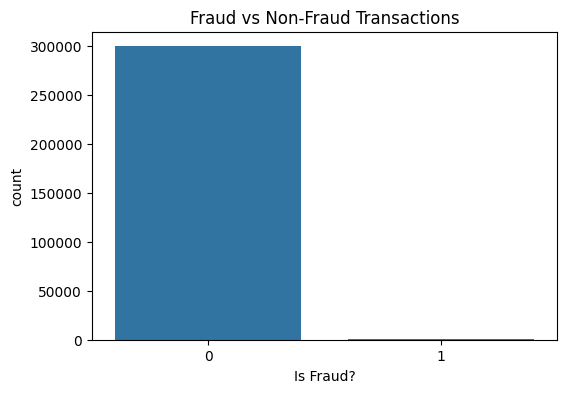

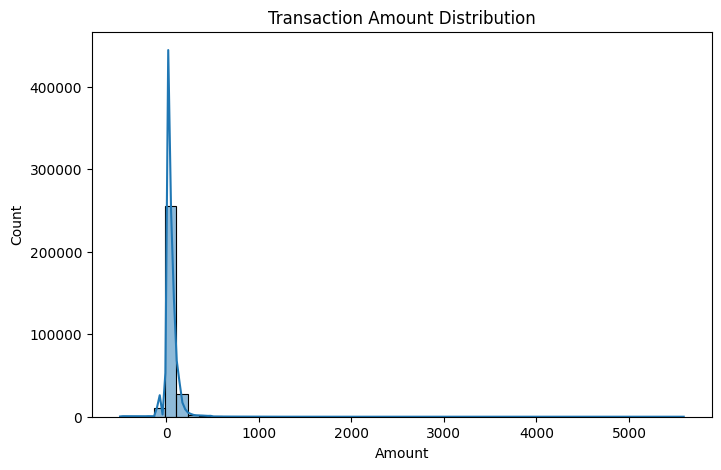

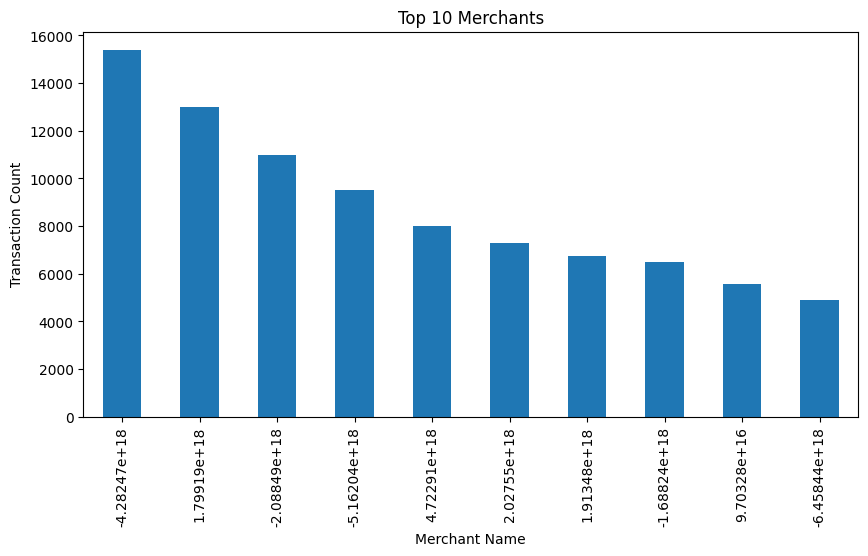

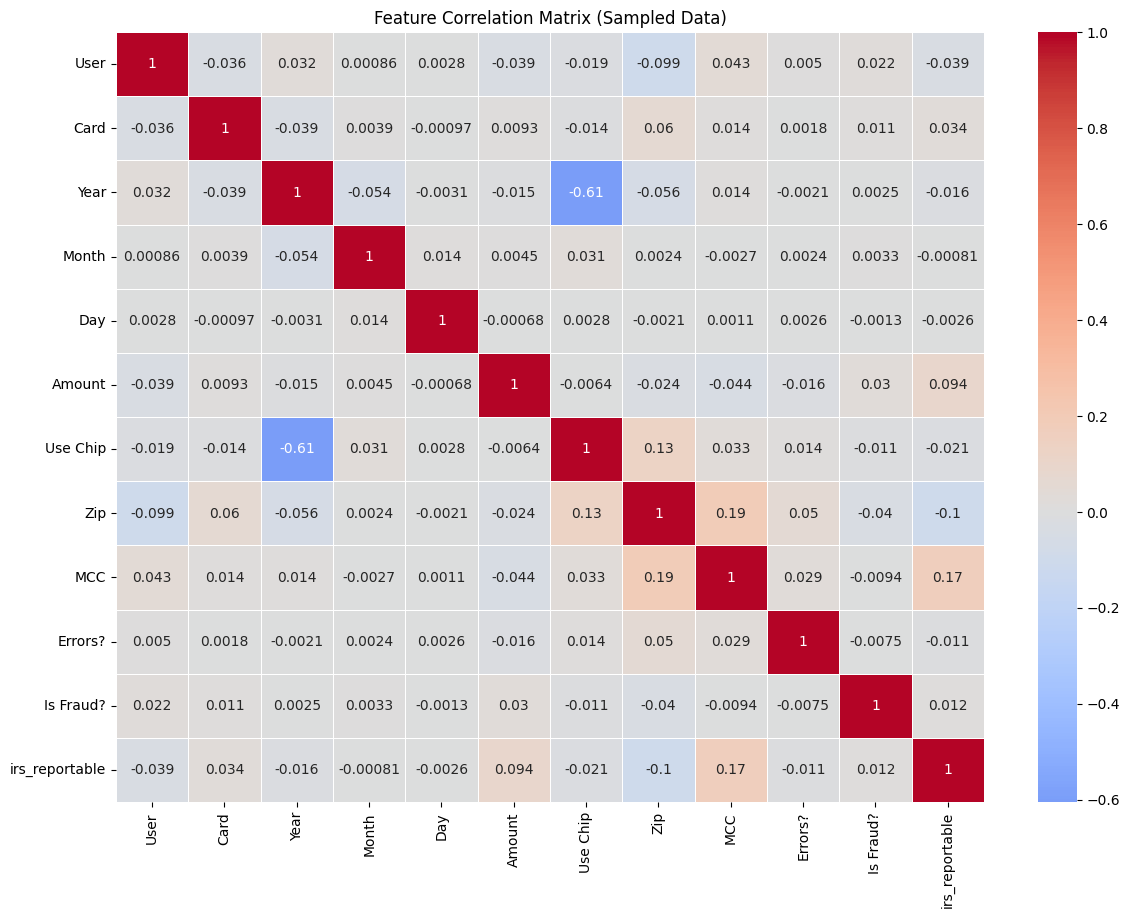

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# ✅ Load Dataset
df = pd.read_csv('merged_dataset.csv', low_memory=False)

# ✅ Convert 'Amount' to numeric
df['Amount'] = pd.to_numeric(df['Amount'].str.replace('$', '', regex=False), errors='coerce')

# ✅ Encode Binary Columns
le = LabelEncoder()
binary_columns = ['Use Chip', 'Errors?', 'Is Fraud?', 'irs_reportable']
for col in binary_columns:
    df[col] = le.fit_transform(df[col].astype(str))

# ✅ One-Hot Encode Categorical Columns
df = pd.get_dummies(df, columns=['Merchant City', 'Merchant State', 'irs_description'], drop_first=True)

# ✅ Treat 'Merchant Name' as Categorical (not numeric)
df['Merchant Name'] = df['Merchant Name'].astype(str)

# ✅ Sample 10% of the data for EDA (optional for faster processing)
df_sample = df.sample(frac=0.3, random_state=42)

# 📊 Basic Info
print(df_sample.info())
print(df_sample.describe())

# 📊 Fraud vs Non-Fraud Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Is Fraud?', data=df_sample)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

# 📊 Amount Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_sample['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# 📊 Merchant Name Frequency (Top 10)
plt.figure(figsize=(10,5))
df_sample['Merchant Name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Merchants')
plt.xlabel('Merchant Name')
plt.ylabel('Transaction Count')
plt.show()

# 📊 Correlation Heatmap (Ignoring String-Based Columns)
numeric_df = df_sample.select_dtypes(include=['number'])
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Feature Correlation Matrix (Sampled Data)')
plt.show()


In [15]:
print(df['Amount'].dtype)


float64


In [16]:
# Step 1: Perform feature engineering on the full dataset
import numpy as np

# ✅ Convert 'Transaction Time' to datetime
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

df['User_Transaction_Count'] = df.groupby('User')['User'].transform('count')
df['Transaction_Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Amount_Log'] = np.log1p(df['Amount'])
df['User_Avg_Transaction_Amount'] = df.groupby('User')['Amount'].transform('mean')
df['Time_Diff'] = df.groupby('User')['Time'].diff().dt.total_seconds()

# Step 2: Now split fraud and non-fraud transactions
fraud_df = df[df['Is Fraud?'] == 1]
non_fraud_df = df[df['Is Fraud?'] == 0]


<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ogev0\AppData\Local\Temp\ipykernel_27172\3208952793.py:6: SyntaxWarning: invalid escape sequence '\$'
  df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\ogev0\AppData\Local\Temp\ipykernel_27172\3208952793.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
c:\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
# Separate fraud and non-fraud transactions
fraud_df = df[df['Is Fraud?'] == 1]  # Fraud transactions
non_fraud_df = df[df['Is Fraud?'] == 0]  # Non-Fraud transactions

# Display counts
print(f"Fraud Transactions: {len(fraud_df)}")
print(f"Non-Fraud Transactions: {len(non_fraud_df)}")

print(fraud_df)

Fraud Transactions: 1220
Non-Fraud Transactions: 998780
        User  Card  Year  Month  Day                Time  Amount  Use Chip  \
921       50     0  2008      6   12 2025-02-25 10:30:00   35.34         1   
925        2     4  2015      9    2 2025-02-25 13:42:00   79.60         1   
982      100     5  2013     10   18 2025-02-25 07:50:00   98.88         1   
2239      15     5  2008      6   21 2025-02-25 13:31:00   87.79         2   
5278       0     3  2008     10   12 2025-02-25 15:54:00   96.19         2   
...      ...   ...   ...    ...  ...                 ...     ...       ...   
993422    41     3  2007     12    8 2025-02-25 16:55:00  469.00         1   
995077    17     2  2009      2   21 2025-02-25 08:47:00  182.82         2   
998471    34     1  2010      1   19 2025-02-25 03:07:00    7.24         2   
998772   102     0  2018      4   11 2025-02-25 14:09:00   93.07         2   
998990    36     2  2013     10    6 2025-02-25 06:33:00   56.43         1   

       

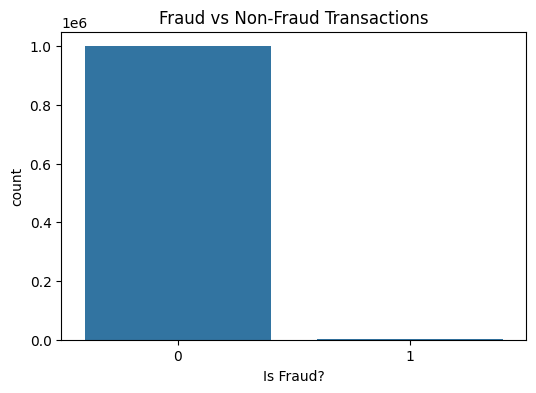

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Is Fraud?', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()


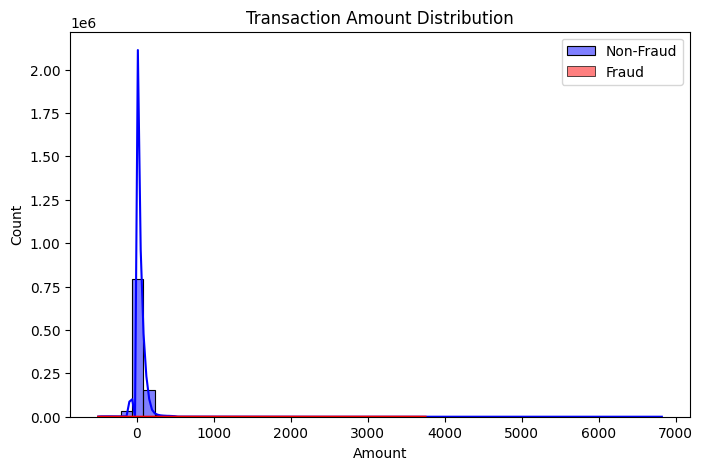

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Is Fraud?'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Non-Fraud')
sns.histplot(df[df['Is Fraud?'] == 1]['Amount'], bins=50, kde=True, color='red', label='Fraud')
plt.legend()
plt.title('Transaction Amount Distribution')
plt.show()


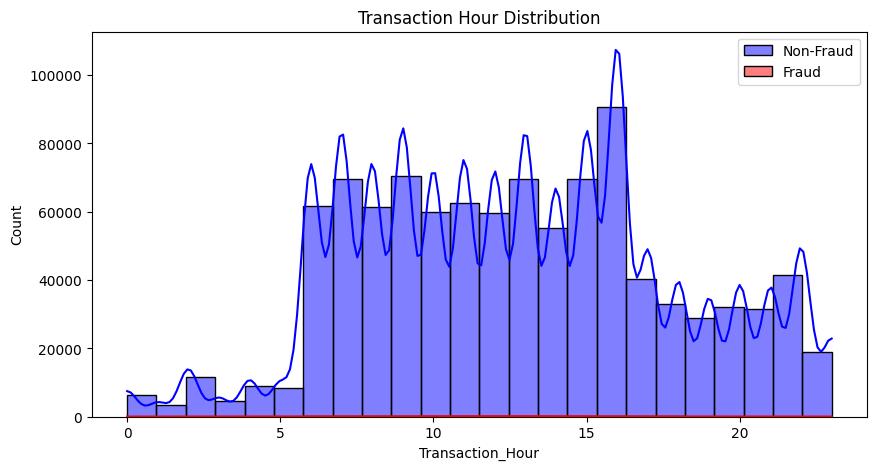

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Is Fraud?'] == 0]['Transaction_Hour'], bins=24, kde=True, color='blue', label='Non-Fraud')
sns.histplot(df[df['Is Fraud?'] == 1]['Transaction_Hour'], bins=24, kde=True, color='red', label='Fraud')
plt.legend()
plt.title('Transaction Hour Distribution')
plt.show()


Feature Selection

In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))


Categorical Columns: Index(['Merchant Name', 'edited_description', 'combined_description',
       'usda_description'],
      dtype='object')


In [22]:
print(df.columns)


Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip',
       'Merchant Name', 'Zip',
       ...
       'irs_description_Travel Agencies, Tour Operators',
       'irs_description_Utilities ', 'irs_description_Wholesale Clubs',
       'irs_description_Wires, Money Orders',
       'irs_description_Women’s Ready-To-Wear Stores',
       'User_Transaction_Count', 'Transaction_Hour', 'Amount_Log',
       'User_Avg_Transaction_Amount', 'Time_Diff'],
      dtype='object', length=5091)


In [30]:
import gc
gc.collect()

df_sample = df.sample(frac=0.01, random_state=42)

from sklearn.feature_selection import mutual_info_classif

X = df_sample.drop(columns=['Is Fraud?', 'Time', 'Merchant Name'])  # Remove non-numeric, irrelevant columns
y = df_sample['Is Fraud?']

categorical_columns = X.select_dtypes(include=['object']).columns
#print("Categorical Columns:", categorical_columns)
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
from sklearn.preprocessing import LabelEncoder

print("Columns in X:", X.columns)
missing_cols = set(['edited_description']) - set(X.columns)
#print("Missing Columns:", missing_cols)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_columns:
    if col in X.columns:  # ✅ Check before processing
        X[col] = le.fit_transform(X[col].astype(str))
    else:
        print(f"Skipping missing column: {col}")

#print(X.isnull().sum())  # Shows count of NaNs per column
X.fillna(X.median(), inplace=True)  # Fill with median (for numerical features)
X.fillna("Unknown", inplace=True)   # Fill with 'Unknown' for categorical features
X.dropna(inplace=True)
y = y[X.index]  # Ensure target variable aligns
#print(X.isnull().sum().sum())  # Should print 0
feature_scores = mutual_info_classif(X, y, random_state=42)

# Compute feature importance using Mutual Information
feature_scores = mutual_info_classif(X, y, random_state=42)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': feature_scores})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display top 10 features
print(feature_importance.head(20))


Columns in X: Index(['User', 'Card', 'Year', 'Month', 'Day', 'Amount', 'Use Chip', 'Zip',
       'MCC', 'Errors?',
       ...
       'irs_description_Travel Agencies, Tour Operators',
       'irs_description_Utilities ', 'irs_description_Wholesale Clubs',
       'irs_description_Wires, Money Orders',
       'irs_description_Women’s Ready-To-Wear Stores',
       'User_Transaction_Count', 'Transaction_Hour', 'Amount_Log',
       'User_Avg_Transaction_Amount', 'Time_Diff'],
      dtype='object', length=5088)
                          Feature  Importance
9                         Errors?    0.006609
6                        Use Chip    0.003279
4081   Merchant City_Soda Springs    0.001361
923         Merchant City_Colwich    0.001180
10             edited_description    0.001134
862       Merchant City_Clewiston    0.001103
3470      Merchant City_Placentia    0.001070
2115          Merchant City_Ionia    0.001069
1714   Merchant City_Grand Island    0.001046
3976   Merchant City_Sellersv

In [33]:
import pandas as pd

# Assuming 'feature_importance' is your DataFrame from previous analysis
# Set a threshold for feature selection
threshold = 0.001
important_features = feature_importance[feature_importance['Importance'] > threshold]['Feature']

# Subset the original DataFrame 'df' to include only important features
df_selected = df[important_features]


In [34]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
iso_forest = IsolationForest(
    n_estimators=100,          # Number of base estimators
    max_samples='auto',        # Number of samples to draw from X to train each base estimator
    contamination='auto',      # Proportion of outliers in the data set
    random_state=42            # Ensures reproducibility
)

# Fit the model to the selected features
iso_forest.fit(df_selected)

# Predict anomalies
# -1 for anomalies, 1 for normal points
anomaly_labels = iso_forest.predict(df_selected)

# Add the anomaly labels to your DataFrame
df_selected['Anomaly'] = anomaly_labels


C:\Users\ogev0\AppData\Local\Temp\ipykernel_27172\4275621146.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Anomaly'] = anomaly_labels


In [35]:
# Get anomaly scores
df_selected['Anomaly_Score'] = iso_forest.decision_function(df_selected[important_features])

# Filter anomalies
anomalies = df_selected[df_selected['Anomaly'] == -1]

# Display anomalies
print(anomalies)


        Errors?  Use Chip  Merchant City_Soda Springs  Merchant City_Colwich  \
6            18         0                       False                  False   
16           18         2                       False                  False   
18           18         0                       False                  False   
19           18         2                       False                  False   
26           18         1                       False                  False   
...         ...       ...                         ...                    ...   
999980       18         2                       False                  False   
999985       18         2                       False                  False   
999988       18         1                       False                  False   
999995       18         2                       False                  False   
999997       18         0                       False                  False   

        edited_description  Merchant Ci

C:\Users\ogev0\AppData\Local\Temp\ipykernel_27172\2947208472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Anomaly_Score'] = iso_forest.decision_function(df_selected[important_features])


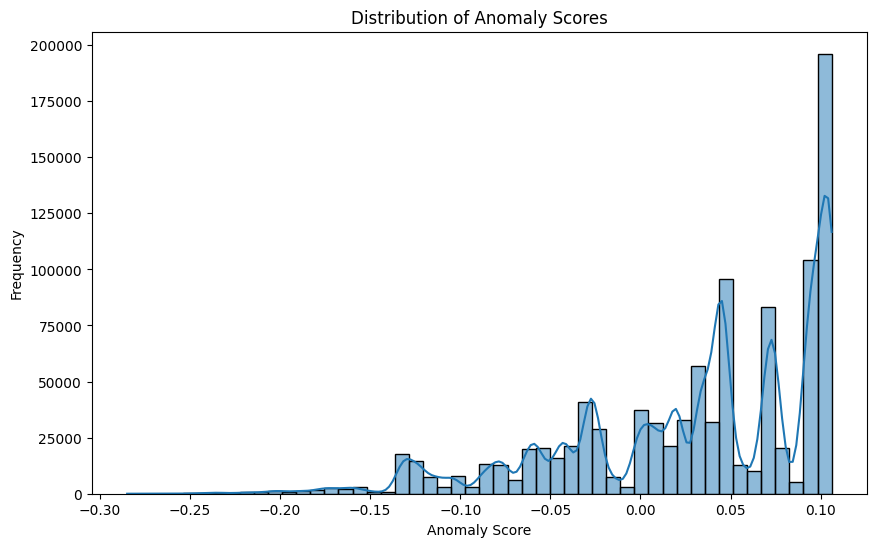

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example visualization: Distribution of anomaly scores
plt.figure(figsize=(10, 6))
sns.histplot(df_selected['Anomaly_Score'], bins=50, kde=True)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


In [37]:
# Count of anomalies detected
num_anomalies = df_selected[df_selected['Anomaly'] == -1].shape[0]
total_samples = df_selected.shape[0]

print(f"Anomalies Detected: {num_anomalies}/{total_samples} ({(num_anomalies / total_samples) * 100:.2f}%)")


Anomalies Detected: 283592/1000000 (28.36%)


In [38]:
# Compare anomalies with actual fraud labels
df_selected['Actual_Fraud'] = y  # Assuming y contains the actual fraud labels

# True Positives (correctly detected fraud cases)
true_positives = df_selected[(df_selected['Anomaly'] == -1) & (df_selected['Actual_Fraud'] == 1)]

# False Positives (normal transactions wrongly flagged as fraud)
false_positives = df_selected[(df_selected['Anomaly'] == -1) & (df_selected['Actual_Fraud'] == 0)]

# Print results
print(f"True Positives: {len(true_positives)}")
print(f"False Positives: {len(false_positives)}")


True Positives: 4
False Positives: 2767


C:\Users\ogev0\AppData\Local\Temp\ipykernel_27172\3230303257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Actual_Fraud'] = y  # Assuming y contains the actual fraud labels


In [39]:
iso_forest = IsolationForest(
    n_estimators=200,        # Increase number of trees
    max_samples=0.8,         # Use 80% of data per tree
    contamination=0.005,     # Adjust based on fraud occurrence
    random_state=42
)

iso_forest.fit(df_selected[important_features])
df_selected['Anomaly'] = iso_forest.predict(df_selected[important_features])


C:\Users\ogev0\AppData\Local\Temp\ipykernel_27172\3705637664.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Anomaly'] = iso_forest.predict(df_selected[important_features])


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.005)
df_selected['LOF_Anomaly'] = lof.fit_predict(df_selected[important_features])

# Retain only transactions that were flagged by both methods
df_selected['Final_Anomaly'] = ((df_selected['Anomaly'] == -1) & (df_selected['LOF_Anomaly'] == -1)).astype(int)


In [ ]:
"""from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model Performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")"""


[[1999    0]
 [   1    0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.00      0.00      0.00         1

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 0.9995


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
print(y.value_counts())  # Check class distribution
print(X.shape)           # Check dataset size


Is Fraud?
0    100
Name: count, dtype: int64
(100, 5088)


In [ ]:
"""from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.4, random_state=42)  # Adjust contamination level

# Train on fraud samples (assuming fraud is "normal" in this dataset)
iso_forest.fit(X)

# Predict anomalies (fraud cases should be labeled as -1)
y_pred = iso_forest.predict(X)

# Convert predictions to binary labels (1 = fraud, 0 = non-fraud)
y_pred = [1 if p == -1 else 0 for p in y_pred]

print(y_pred[:10])  # Sample predictions """




[0, 0, 0, 1, 1, 0, 0, 1, 0, 1]
